In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette("viridis")

# 1 - CARGA DE DATOS

In [3]:
# 1. CARGA DE DATOS
print("1. CARGA Y EXPLORACIÓN INICIAL DE DATOS")
print("-" * 50)

# Cargar dataset
df = pd.read_csv('https://storage.googleapis.com/bucket-mda11-business-cases/business-case-7/zettacorp.csv')

# Mostrar las primeras filas del dataset
print("\nPrimeras 5 filas del dataset:")
display(df.head())

1. CARGA Y EXPLORACIÓN INICIAL DE DATOS
--------------------------------------------------

Primeras 5 filas del dataset:


,EmployeeAge,EmployeeAttrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Información de las columnas
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeAge               1470 non-null   int64 
 1   EmployeeAttrition         1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14

# 2 - EXPLORACIÓN DE DATOS


2. EXPLORACIÓN DETALLADA DE DATOS
--------------------------------------------------
Distribución de empleados por estado:
Total de empleados que renunciaron (Yes): 237
Total de empleados que no renunciaron (No): 1233
Tasa de renuncia: 16.12%


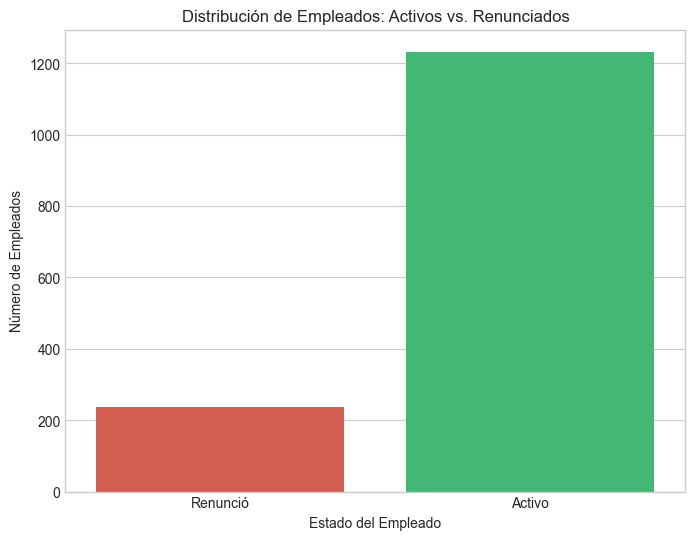


Análisis univariado de variables numéricas


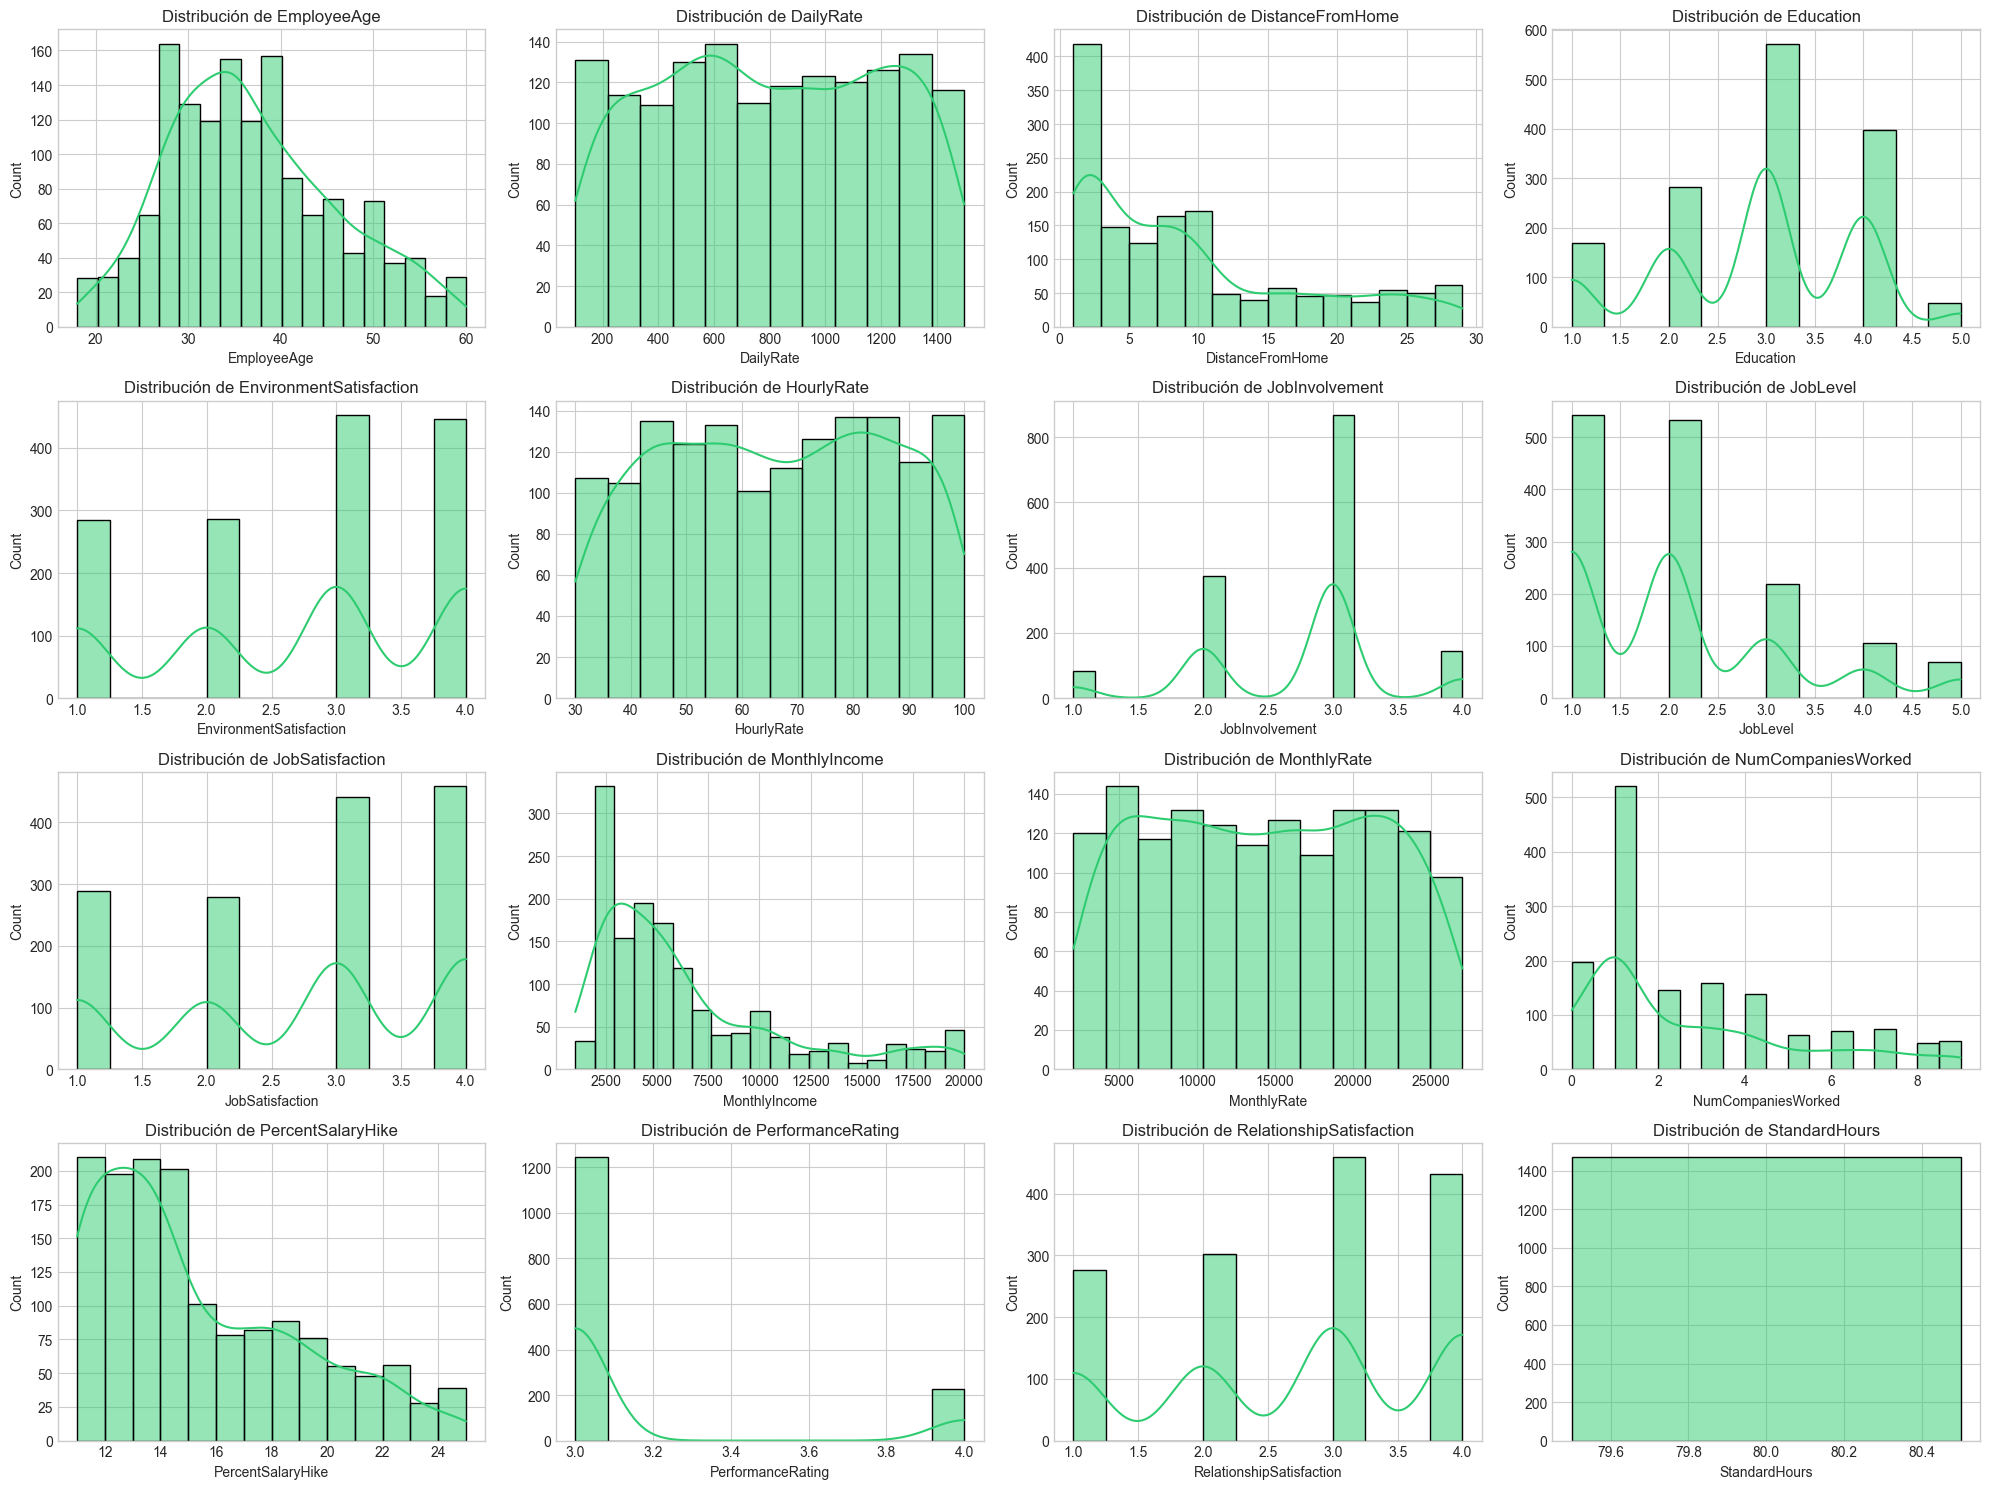

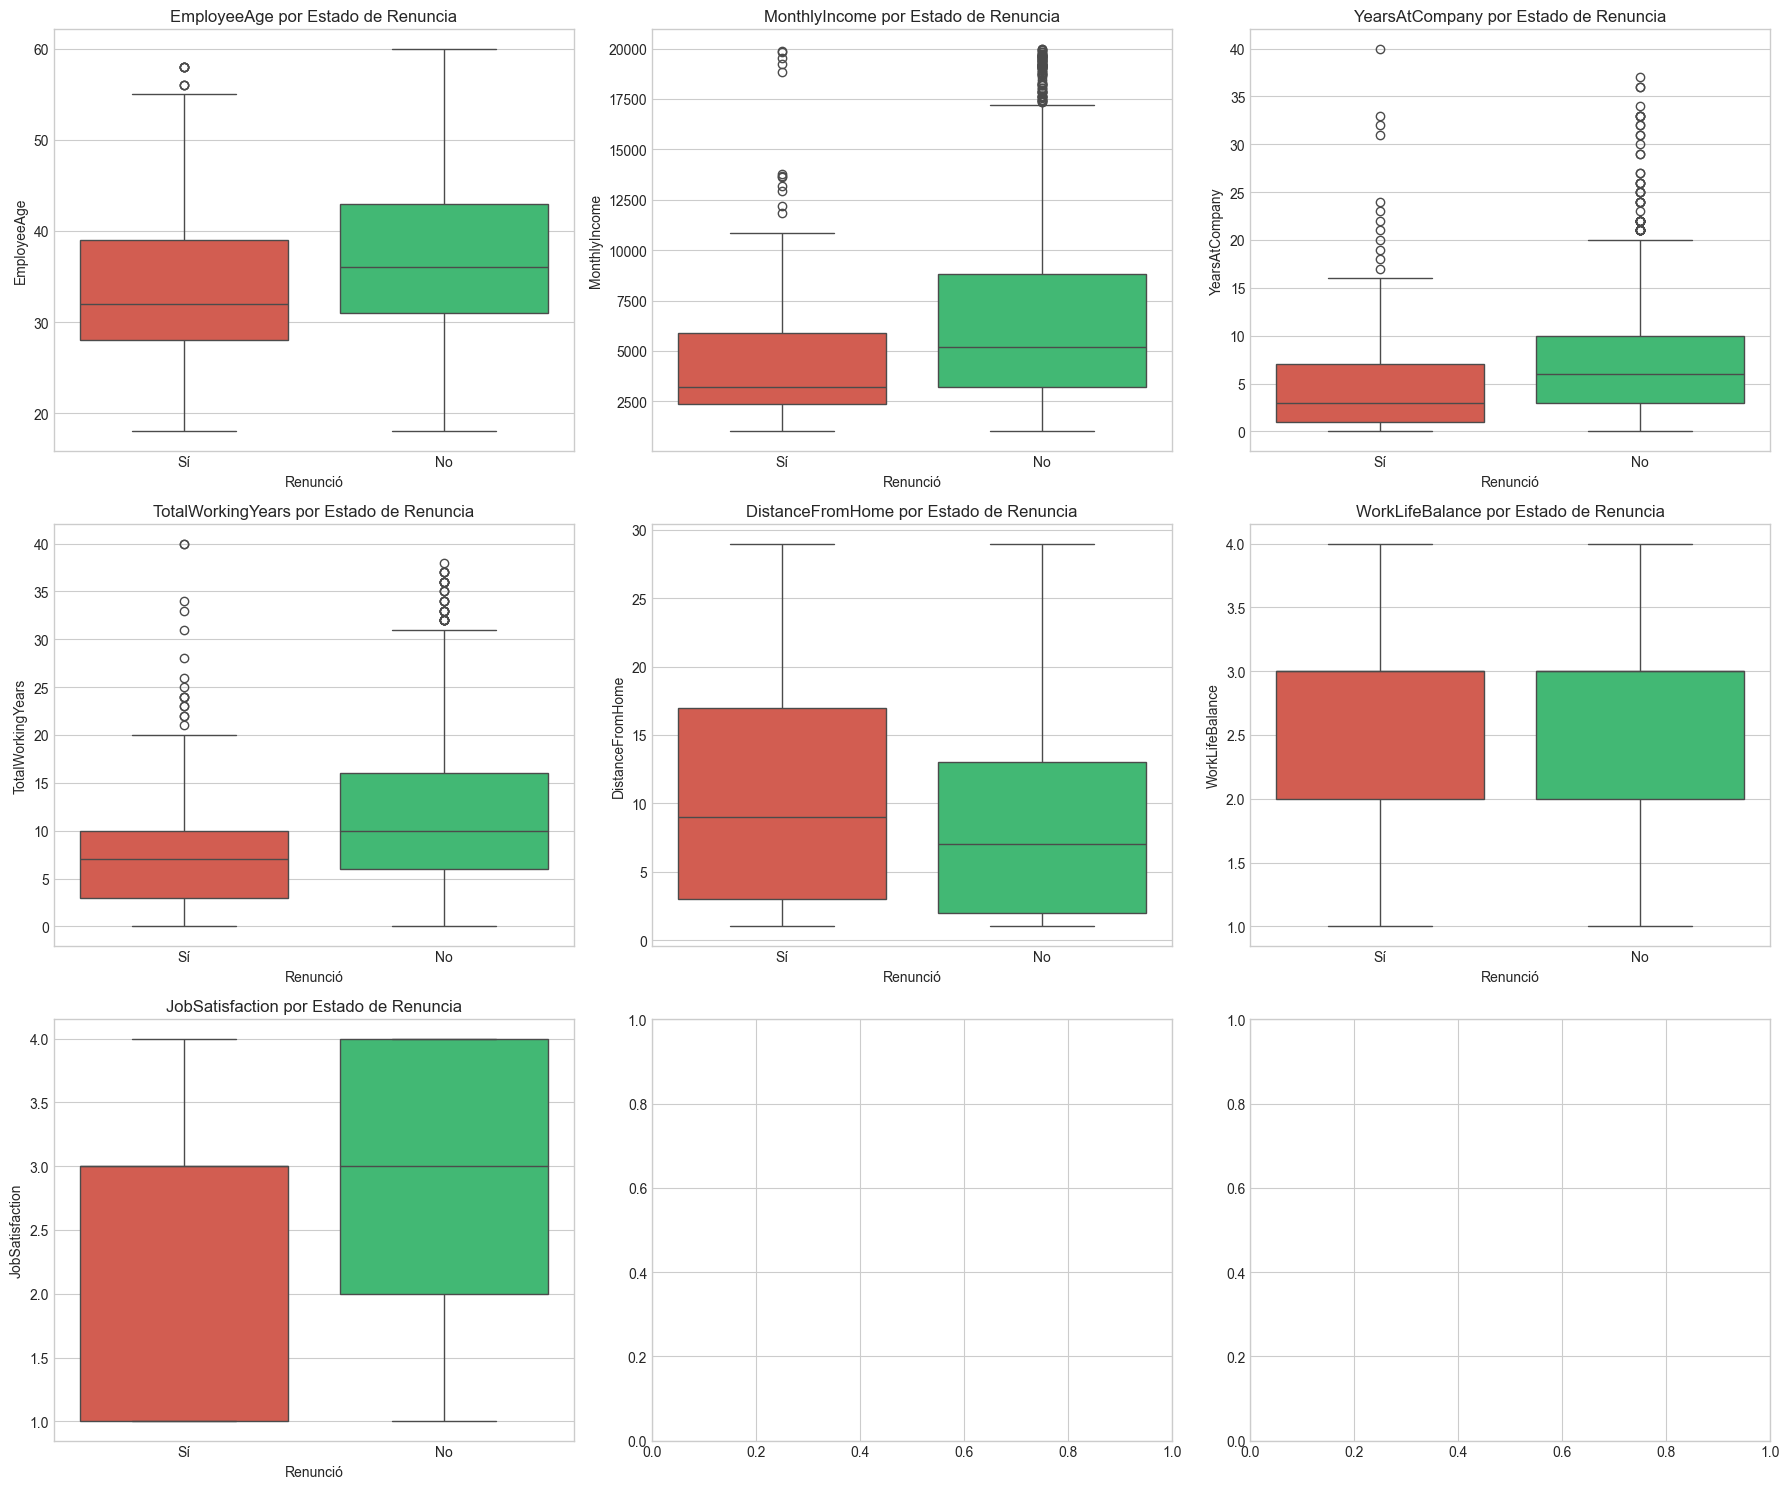

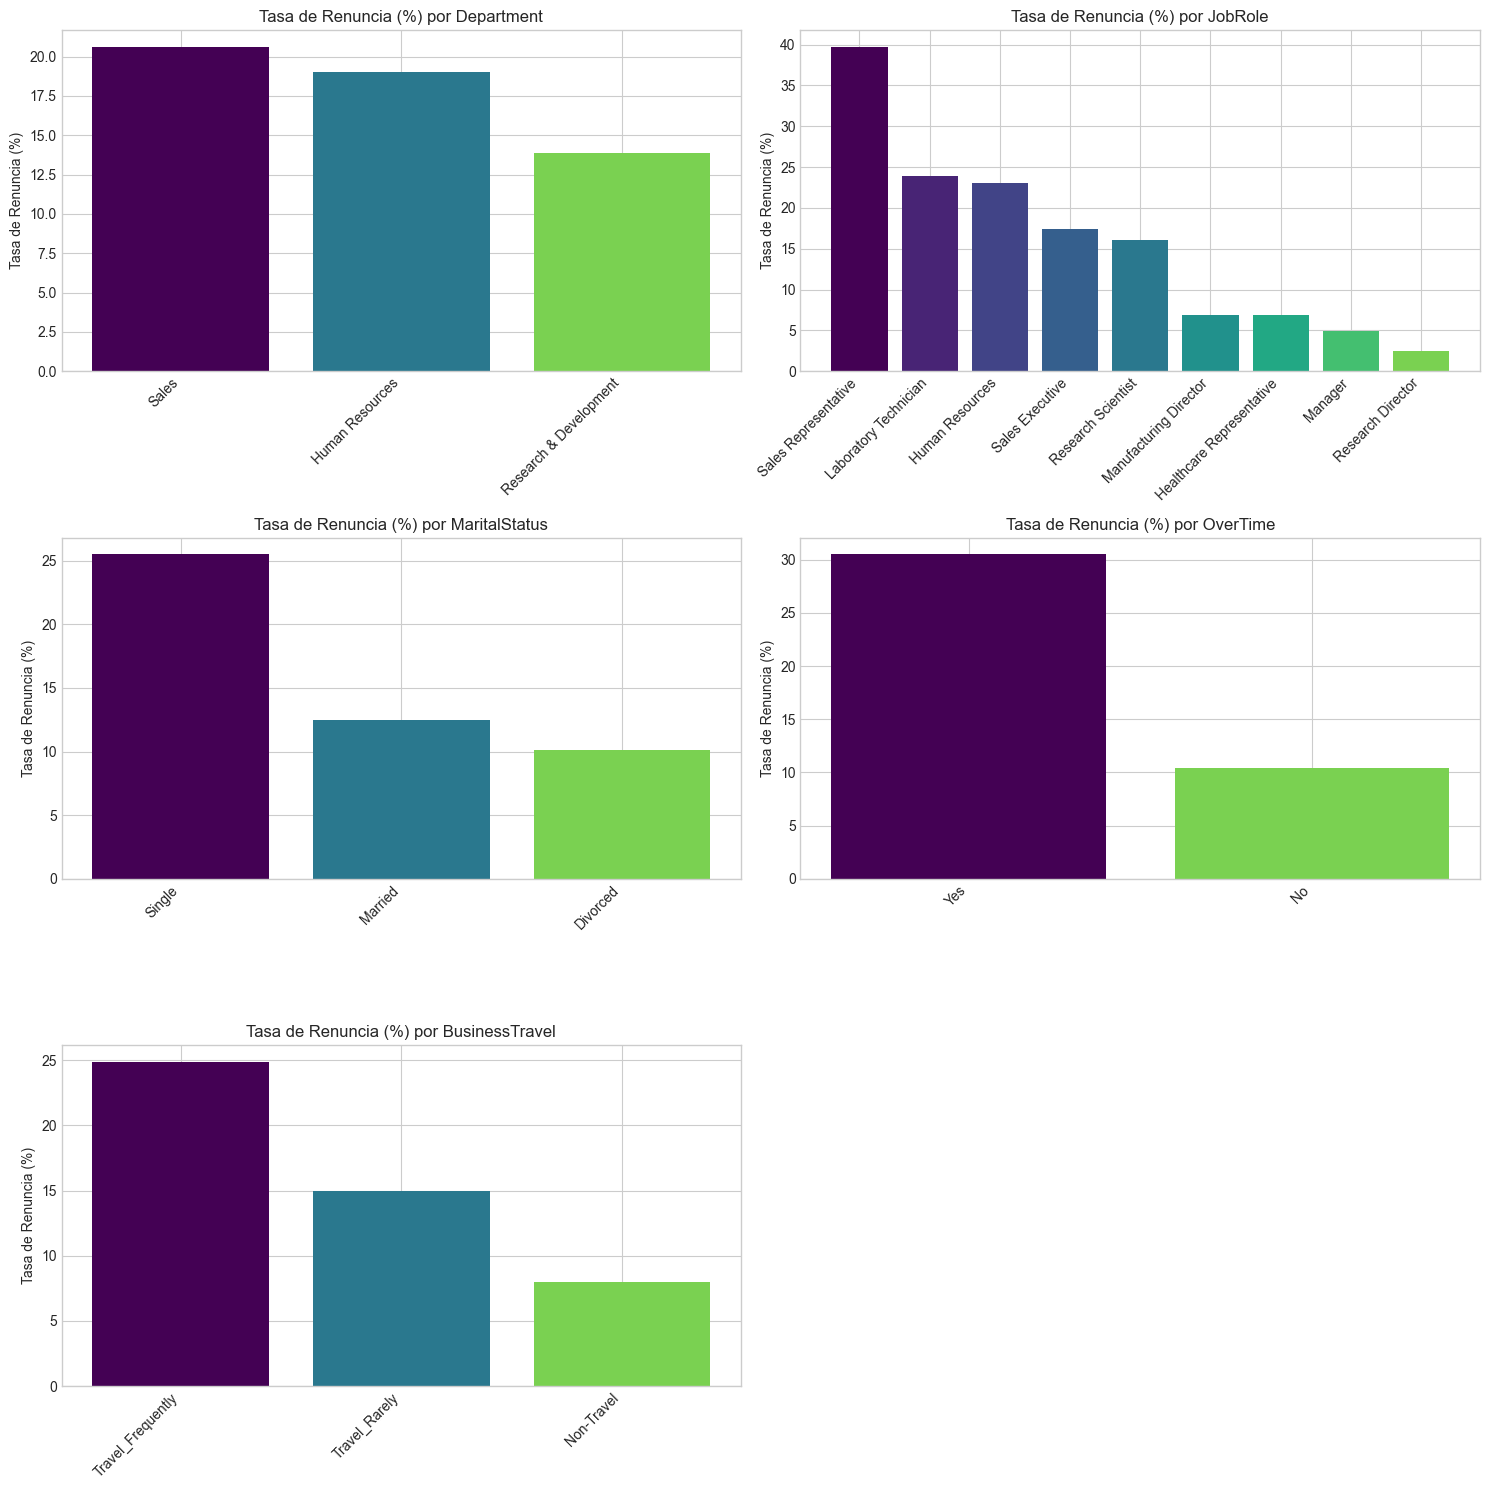

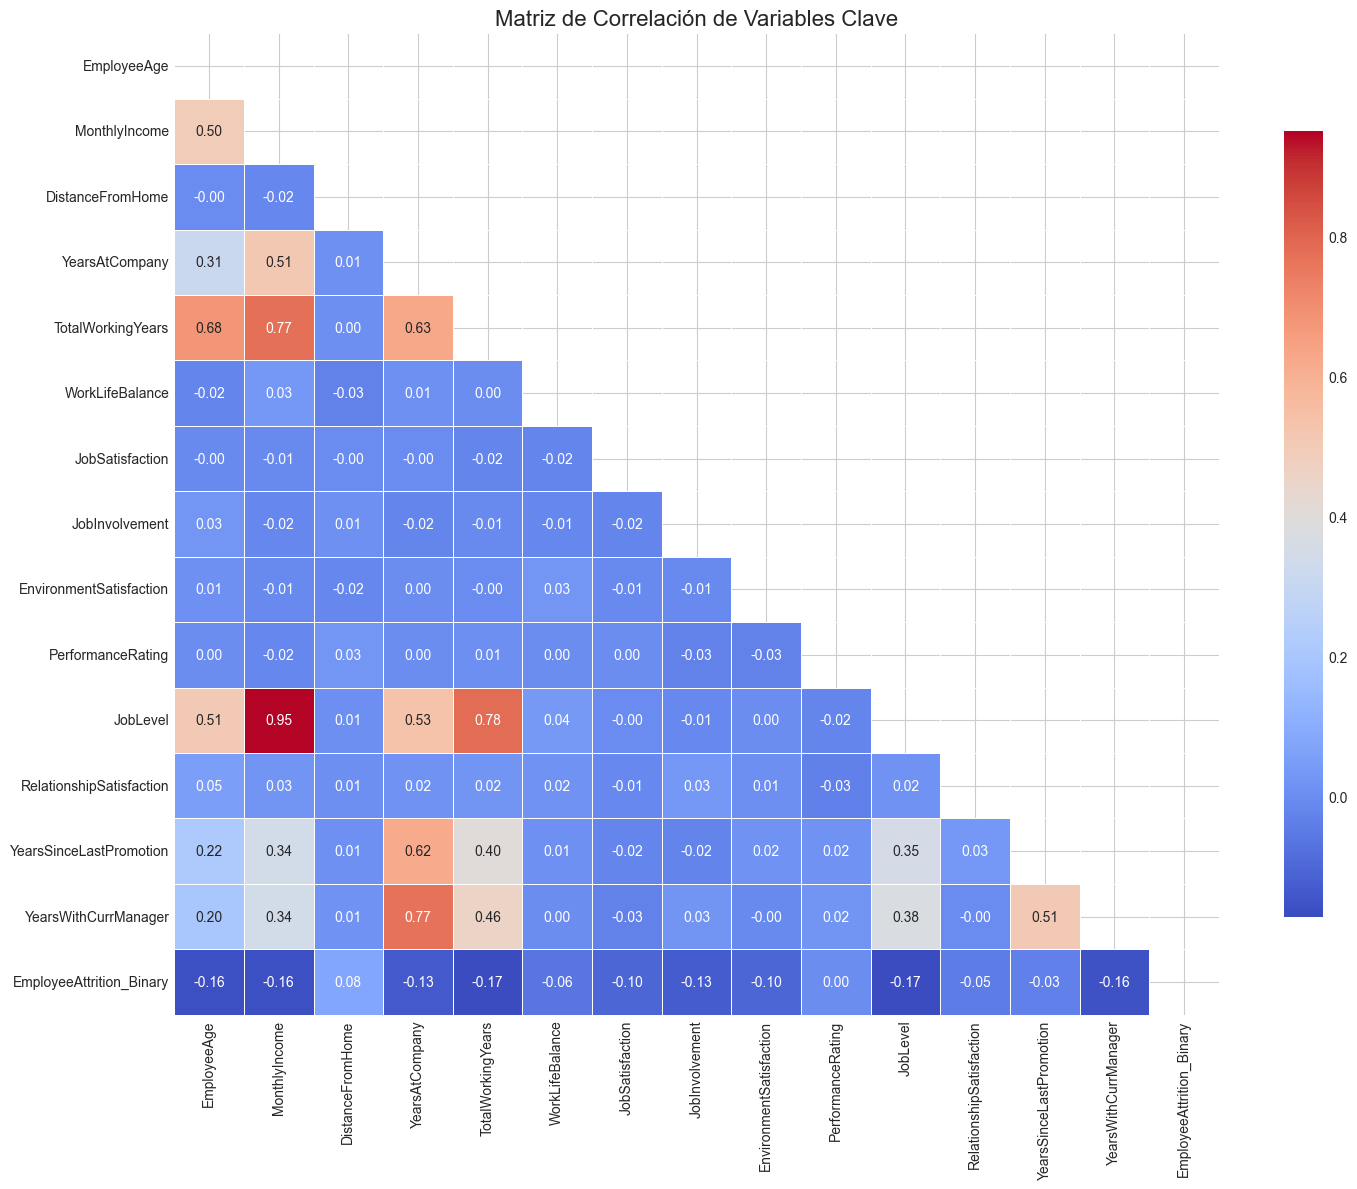

In [5]:
# 2. EXPLORACIÓN DETALLADA
print("\n2. EXPLORACIÓN DETALLADA DE DATOS")
print("-" * 50)

# Convertir la variable objetivo a binaria (1: renunció, 0: sigue activo)
df['EmployeeAttrition_Binary'] = df['EmployeeAttrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Distribución de la variable objetivo
attrition_counts = df['EmployeeAttrition'].value_counts()
print('===========================================================================')
print("Distribución de empleados por estado:")
attrition_totals = df['EmployeeAttrition'].value_counts()
print("Total de empleados que renunciaron (Yes):", attrition_totals.get('Yes', 0))
print("Total de empleados que no renunciaron (No):", attrition_totals.get('No', 0))
print(f"Tasa de renuncia: {attrition_counts['Yes'] / len(df) * 100:.2f}%")
print('===========================================================================')

# Visualizar la distribución de renuncias
plt.figure(figsize=(8, 6))
sns.countplot(x='EmployeeAttrition', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Distribución de Empleados: Activos vs. Renunciados')
plt.xlabel('Estado del Empleado')
plt.ylabel('Número de Empleados')
plt.xticks([0, 1], ['Renunció', 'Activo'])
plt.savefig('visualizaciones/attrition_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis univariado de variables numéricas
print("\nAnálisis univariado de variables numéricas")

# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'EmployeeNumber']  # Excluir el identificador

# Histogramas de variables numéricas
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols[:16], 1):  # Mostrar 16 para no saturar el código
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color='#2ecc71')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.savefig('visualizaciones/numeric_distributions.png')
plt.show()

# Explorar relaciones con variables numéricas clave
numerical_cols = ['EmployeeAge', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 
                  'DistanceFromHome', 'WorkLifeBalance', 'JobSatisfaction']

# Crear gráficos para variables numéricas importantes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(x='EmployeeAttrition', y=col, data=df, ax=axes[i], 
                   order=['Yes', 'No'],  # Especificar orden
                   palette=['#e74c3c', '#2ecc71'])  # Rojo para "Yes", Verde para "No"
        axes[i].set_title(f'{col} por Estado de Renuncia')
        axes[i].set_xlabel('Renunció')
        axes[i].set_xticklabels(['Sí', 'No'])

plt.tight_layout()
plt.savefig('visualizaciones/numerical_features_by_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

# Explorar variables categóricas clave
categorical_cols = ['Department', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel']

# Calcular tasa de renuncia por cada variable categórica
plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    # Calcular la tasa de renuncia por categoría
    attrition_by_cat = df.groupby(col)['EmployeeAttrition_Binary'].mean() * 100
    attrition_by_cat = attrition_by_cat.sort_values(ascending=False)
    
    # Crear un gradiente de colores basado en el número de categorías
    num_categories = len(attrition_by_cat)
    colors = plt.cm.viridis(np.linspace(0, 0.8, num_categories))
    
    # Crear el gráfico de barras 
    bars = plt.bar(range(num_categories), attrition_by_cat.values, color=colors)
    plt.title(f'Tasa de Renuncia (%) por {col}')
    plt.ylabel('Tasa de Renuncia (%)')
    plt.xticks(range(num_categories), attrition_by_cat.index, rotation=45, ha='right')
    plt.tight_layout()

plt.savefig('visualizaciones/categorical_features_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

# Matriz de correlación con variables importantes
selected_cols = ['EmployeeAge', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 
                'TotalWorkingYears', 'WorkLifeBalance', 'JobSatisfaction',
                'JobInvolvement', 'EnvironmentSatisfaction', 'PerformanceRating',
                'JobLevel', 'RelationshipSatisfaction', 'YearsSinceLastPromotion',
                'YearsWithCurrManager', 'EmployeeAttrition_Binary']

plt.figure(figsize=(15, 12))
corr_matrix = df[selected_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables Clave', fontsize=16)
plt.tight_layout()
plt.savefig('visualizaciones/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 3 - PREPARACIÓN DEL MODELO

In [6]:
# 3. PREPARACIÓN DE DATOS PARA MODELADO
print("\n3. PREPARACIÓN DE DATOS PARA MODELADO")
print("-" * 50)

# Eliminar columnas redundantes o no informativas
columns_to_drop = ['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeAttrition']
X = df.drop(columns_to_drop + ['EmployeeAttrition_Binary'], axis=1)
y = df['EmployeeAttrition_Binary']

# Identificar tipos de columnas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Características categóricas: {len(categorical_features)}")
print(f"Características numéricas: {len(numerical_features)}")

# Preprocesamiento para características numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Tratamiento básico de outliers
# Para este tipo de modelos no es necesario hacer un tratamiento específicos de los valores extremos.
# El propio modelo (Random Forest) usa un sistema para evaluar aquellas variables más representativas. 


3. PREPARACIÓN DE DATOS PARA MODELADO
--------------------------------------------------
Características categóricas: 7
Características numéricas: 23


# 4 - MODELO RANDOM FOREST

In [7]:
# 4. MODELADO CON RANDOM FOREST
print("\n4. MODELADO CON RANDOM FOREST")
print("-" * 50)

# Importar SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Dividir los datos en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento original: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# Crear y entrenar el pipeline completo con SMOTE y Random Forest
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Imprimir información sobre el balanceo
print("\nDistribución de clases después de SMOTE:")
unique, counts = np.unique(model.named_steps['smote'].fit_resample(
    model.named_steps['preprocessor'].fit_transform(X_train),
    y_train)[1], 
    return_counts=True)
print(dict(zip(['No Renuncia', 'Renuncia'], counts)))


4. MODELADO CON RANDOM FOREST
--------------------------------------------------
Tamaño del conjunto de entrenamiento original: 1029 muestras
Tamaño del conjunto de prueba: 441 muestras

Distribución de clases después de SMOTE:
{'No Renuncia': 863, 'Renuncia': 863}


# 5 - OPTIMIZACIÓN DEL MODELO

In [8]:
# 5. OPTIMIZACIÓN DEL MODELO EXISTENTE
print("\n5. OPTIMIZACIÓN DEL MODELO")
print("-" * 50)
from sklearn.model_selection import RandomizedSearchCV

# Definir espacio de búsqueda de hiperparámetros
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'smote__k_neighbors': [3, 5, 7]
}

# Configurar búsqueda aleatoria
random_search = RandomizedSearchCV(
    model,  # Usar el modelo existente
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenar el modelo optimizado
print("\nBuscando mejores hiperparámetros...")
random_search.fit(X_train, y_train)

# Actualizar el modelo con los mejores parámetros
model = random_search.best_estimator_

# Mostrar los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search.best_params_)
print(f"\nMejor F1-score en validación cruzada: {random_search.best_score_:.4f}")


5. OPTIMIZACIÓN DEL MODELO
--------------------------------------------------

Buscando mejores hiperparámetros...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros encontrados:
{'smote__k_neighbors': 3, 'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 50}

Mejor F1-score en validación cruzada: 0.4759


# 6 - EVALUACIÓN DEL MODELO


6. EVALUACIÓN DEL MODELO
--------------------------------------------------


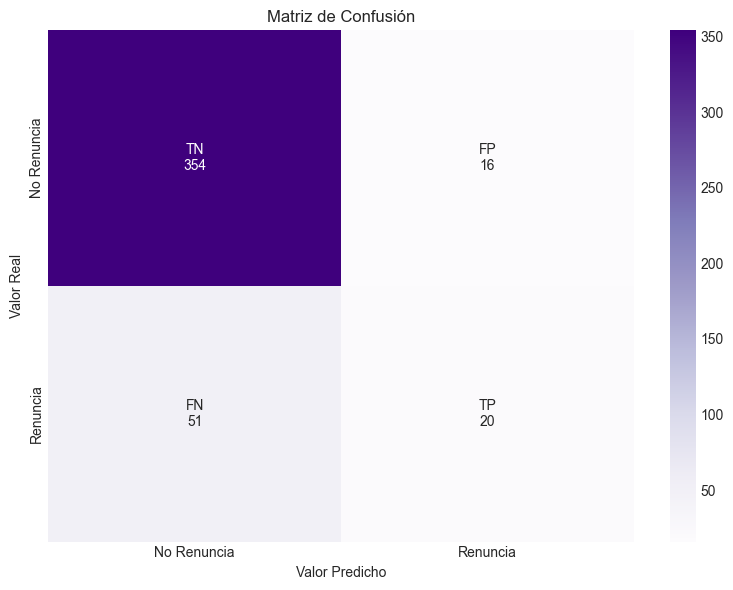

Métricas de rendimiento:
Accuracy: 0.8481
Precision: 0.5556
Recall: 0.2817
F1-score: 0.3738

Reporte de clasificación detallado:
              precision    recall  f1-score   support

 No Renuncia       0.87      0.96      0.91       370
    Renuncia       0.56      0.28      0.37        71

    accuracy                           0.85       441
   macro avg       0.71      0.62      0.64       441
weighted avg       0.82      0.85      0.83       441



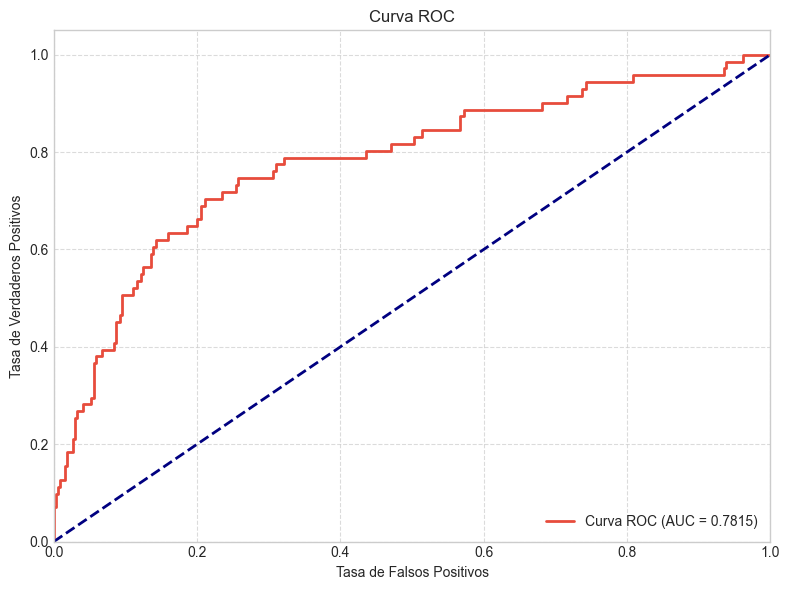

In [9]:
# 6. EVALUACIÓN DEL MODELO
print("\n6. EVALUACIÓN DEL MODELO")
print("-" * 50)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
conf_labels = np.asarray(conf_matrix)
annot = np.core.defchararray.add(labels, "\n")
annot = np.core.defchararray.add(annot, conf_labels.astype(str))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=annot, fmt='', cmap='Purples', 
            xticklabels=['No Renuncia', 'Renuncia'],
            yticklabels=['No Renuncia', 'Renuncia'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.savefig('visualizaciones/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("==========================")
print("Métricas de rendimiento:") 
print(f"Accuracy: {accuracy:.4f}") # Accuracy: Precisión general del modelo
print(f"Precision: {precision:.4f}") # Precision: Proporción de predicciones positivas correctas
print(f"Recall: {recall:.4f}") # Recall: Proporción de casos positivos reales detectados
print(f"F1-score: {f1:.4f}") # F1-score: Media armónica entre precision y recal
print("==========================")

# Reporte de clasificación detallado
print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_pred, target_names=['No Renuncia', 'Renuncia']))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#e74c3c', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('visualizaciones/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# 7 - ANÁLISIS DE LOS ERRORES

In [10]:
# 7. ANÁLISIS DE ERRORES
print("\n7. ANÁLISIS DE ERRORES")
print("-" * 70)

# 7.1 Probabilidad de cada tipo de error
print("\n7.1 Probabilidad de cada tipo de error")
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp

print(f"Verdaderos Negativos (TN): {tn} ({tn/total:.4f})")
print(f"Falsos Positivos (FP): {fp} ({fp/total:.4f})")
print(f"Falsos Negativos (FN): {fn} ({fn/total:.4f})")
print(f"Verdaderos Positivos (TP): {tp} ({tp/total:.4f})")

# 7.2 Análisis de qué clase predice mejor el modelo
print("\n7.2 Análisis de qué clase predice mejor el modelo")
specificity = tn / (tn + fp)  # Capacidad para identificar correctamente los negativos
sensitivity = tp / (tp + fn)  # Capacidad para identificar correctamente los positivos (igual al recall)

print(f"Especificidad (TN / (TN + FP)): {specificity:.4f}")
print(f"Sensibilidad/Recall (TP / (TP + FN)): {sensitivity:.4f}")

if specificity > sensitivity:
    print("\nEl modelo es mejor prediciendo la clase 'No renuncia' (0)")
else:
    print("El modelo es mejor prediciendo la clase 'Renuncia' (1)")


7. ANÁLISIS DE ERRORES
----------------------------------------------------------------------

7.1 Probabilidad de cada tipo de error
Verdaderos Negativos (TN): 354 (0.8027)
Falsos Positivos (FP): 16 (0.0363)
Falsos Negativos (FN): 51 (0.1156)
Verdaderos Positivos (TP): 20 (0.0454)

7.2 Análisis de qué clase predice mejor el modelo
Especificidad (TN / (TN + FP)): 0.9568
Sensibilidad/Recall (TP / (TP + FN)): 0.2817

El modelo es mejor prediciendo la clase 'No renuncia' (0)


### Interpretación de los resultados del modelo

A partir de la matriz de confusión y las métricas de sensibilidad y especificidad, se pueden extraer las siguientes conclusiones:

- El modelo predice mejor la clase **'No Renuncia'** (empleados que permanecen en la empresa), ya que su **especificidad** es mayor que la **sensibilidad**. Es decir, tiene más acierto identificando correctamente a quienes no renuncian.
- La **sensibilidad (recall)** mide la capacidad del modelo para detectar correctamente a los empleados que **renuncian**. Un valor más bajo aquí indica que hay más **falsos negativos**, es decir, empleados que realmente renuncian pero el modelo no los detecta.
- La **especificidad** refleja qué tan bien identifica a los empleados que **no renuncian**. Un valor alto sugiere que el modelo tiene bajo nivel de **falsos positivos** (casos donde se predice renuncia y no ocurre).

#### ¿Qué implican estos errores?

- **Falsos negativos (FN)**: Pueden ser críticos para la empresa, ya que empleados en riesgo de renunciar no serían identificados para una intervención preventiva.
- **Falsos positivos (FP)**: Aunque menos costosos, podrían llevar a tomar acciones innecesarias sobre empleados que realmente no piensan renunciar.

# 8 - ANÁLISIS DE UMBRALES DE DECISIÓN

Análisis necesario si se requiere ajustar el equilibrio entre precisión y recall


8. ANÁLISIS DE UMBRALES DE DECISIÓN
--------------------------------------------------


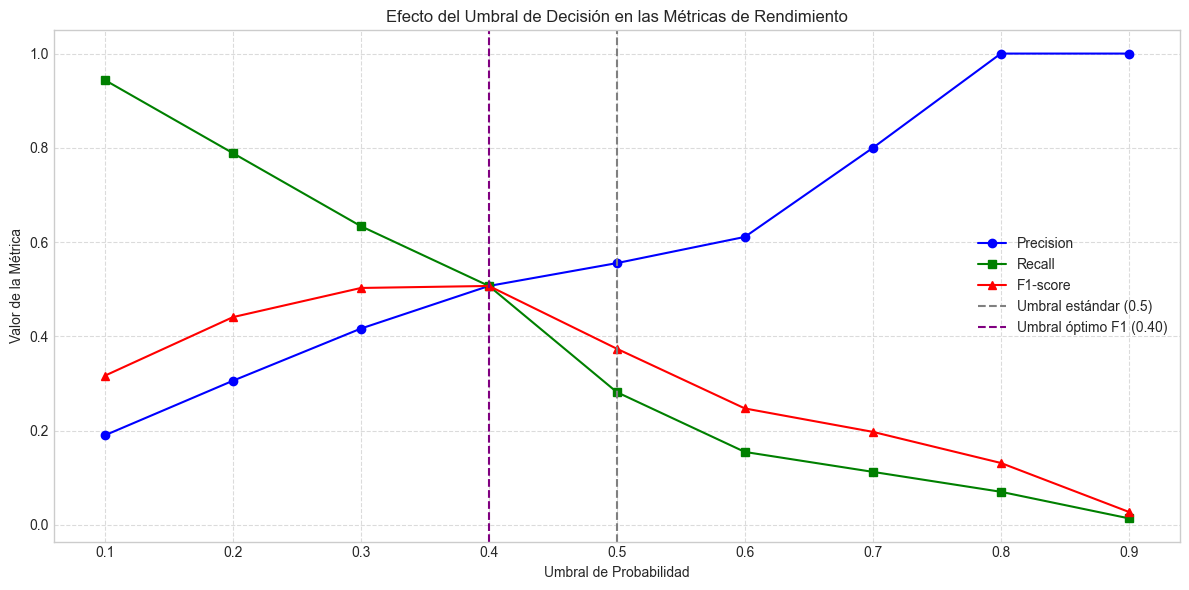


Umbral óptimo para maximizar F1-score: 0.40

Rendimiento con umbral óptimo:
              precision    recall  f1-score   support

 No Renuncia       0.91      0.91      0.91       370
    Renuncia       0.51      0.51      0.51        71

    accuracy                           0.84       441
   macro avg       0.71      0.71      0.71       441
weighted avg       0.84      0.84      0.84       441



In [13]:
# 8. ANÁLISIS DE UMBRALES DE DECISIÓN
print("\n8. ANÁLISIS DE UMBRALES DE DECISIÓN")
print("-" * 50)

# Calcular precision, recall y f1 para diferentes umbrales
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    # Aplicar umbral personalizado
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    
    # Calcular métricas
    precision_t = precision_score(y_test, y_pred_threshold)
    recall_t = recall_score(y_test, y_pred_threshold)
    f1_t = f1_score(y_test, y_pred_threshold)
    
    # Guardar resultados
    results.append({
        'Umbral': threshold,
        'Precision': precision_t,
        'Recall': recall_t,
        'F1-score': f1_t
    })

# Convertir a DataFrame
threshold_df = pd.DataFrame(results)

# Visualizar el efecto de los umbrales
plt.figure(figsize=(12, 6))
plt.plot(threshold_df['Umbral'], threshold_df['Precision'], 'b-', marker='o', label='Precision')
plt.plot(threshold_df['Umbral'], threshold_df['Recall'], 'g-', marker='s', label='Recall')
plt.plot(threshold_df['Umbral'], threshold_df['F1-score'], 'r-', marker='^', label='F1-score')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Umbral estándar (0.5)')

# Encontrar umbral óptimo para F1
optimal_idx = threshold_df['F1-score'].idxmax()
optimal_threshold = threshold_df.loc[optimal_idx, 'Umbral']
plt.axvline(x=optimal_threshold, color='purple', linestyle='--', 
            label=f'Umbral óptimo F1 ({optimal_threshold:.2f})')

plt.title('Efecto del Umbral de Decisión en las Métricas de Rendimiento')
plt.xlabel('Umbral de Probabilidad')
plt.ylabel('Valor de la Métrica')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('visualizaciones/threshold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nUmbral óptimo para maximizar F1-score: {optimal_threshold:.2f}")
print("\nRendimiento con umbral óptimo:")
best_y_pred = (y_pred_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, best_y_pred, target_names=['No Renuncia', 'Renuncia']))

# 9 - VALIDACIÓN CRUZADA ESTRATIFICADA

En este, se muestra la estabilidad y consistencia en diferentes subconjuntos de datos lo que nos permite justificar, de manera más óptima, las decisiones basadas en predicciones


9. VALIDACIÓN CRUZADA ESTRATIFICADA
--------------------------------------------------

Resultados de Validación Cruzada Estratificada (5-fold):
                accuracy  precision  recall      f1
Fold 1            0.8469     0.5556  0.3125  0.4000
Fold 2            0.8367     0.5000  0.3750  0.4286
Fold 3            0.8605     0.6250  0.3191  0.4225
Fold 4            0.8980     0.9474  0.3830  0.5455
Fold 5            0.8605     0.6071  0.3617  0.4533
Media             0.8605     0.6470  0.3503  0.4500
Desv. Estándar    0.0207     0.1564  0.0290  0.0507


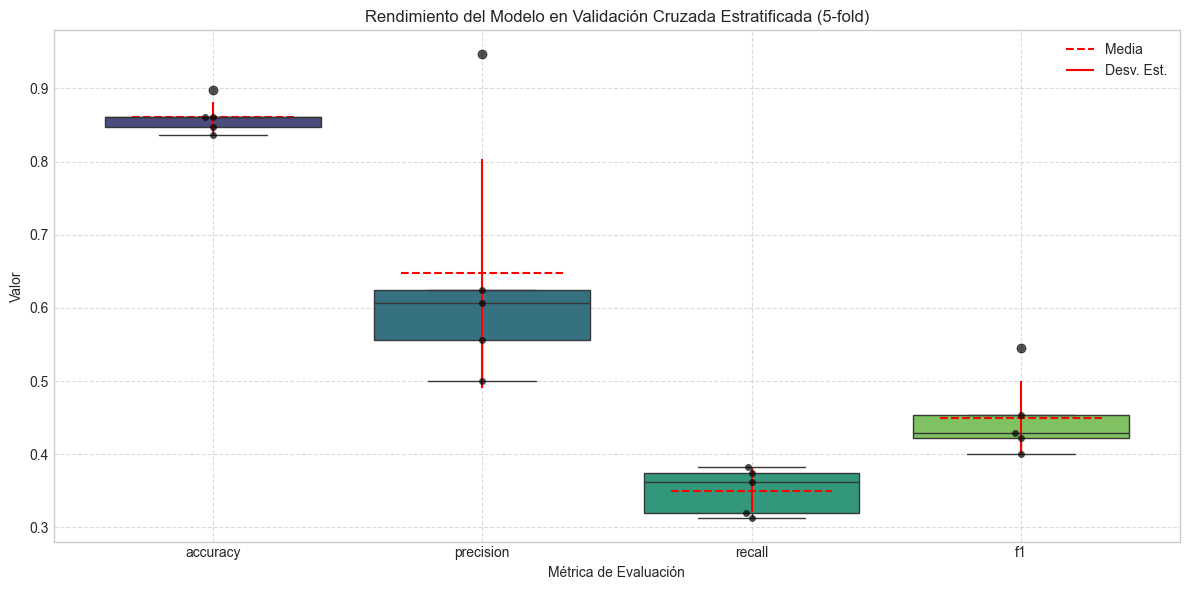

In [23]:
# 9. VALIDACIÓN CRUZADA ESTRATIFICADA
print("\n9. VALIDACIÓN CRUZADA ESTRATIFICADA")
print("-" * 50)

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Definir un pipeline simplificado para validación cruzada
model_cv = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=random_search.best_params_['classifier__n_estimators'], 
        max_depth=random_search.best_params_['classifier__max_depth'],
        min_samples_split=random_search.best_params_['classifier__min_samples_split'],
        min_samples_leaf=random_search.best_params_['classifier__min_samples_leaf'],
        max_features=random_search.best_params_['classifier__max_features'],
        random_state=42
    ))
])

# Configurar validación cruzada estratificada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ejecutar validación cruzada para diferentes métricas
metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = {}

for metric in metrics:
    cv_scores = cross_val_score(model_cv, X, y, cv=cv, scoring=metric)
    cv_results[metric] = cv_scores

# Crear DataFrame con resultados
cv_df = pd.DataFrame(cv_results)
cv_df.index = [f'Fold {i+1}' for i in range(len(cv_df))]
cv_df.loc['Media'] = cv_df.mean()
cv_df.loc['Desv. Estándar'] = cv_df.std()

# Mostrar resultados de validación cruzada
print("\nResultados de Validación Cruzada Estratificada (5-fold):")
print(cv_df.round(4))

# Visualizar resultados de validación cruzada
plt.figure(figsize=(12, 6))

# Preparar datos para visualización
cv_melt = pd.melt(cv_df.iloc[:-2].reset_index(), id_vars='index', var_name='Métrica', value_name='Valor')
cv_means = cv_df.loc['Media'].to_dict()
cv_stds = cv_df.loc['Desv. Estándar'].to_dict()

# Crear gráfico con boxplots
sns.boxplot(x='Métrica', y='Valor', data=cv_melt, palette='viridis')

# Añadir puntos para cada fold
sns.swarmplot(x='Métrica', y='Valor', data=cv_melt, color='black', alpha=0.7)

# Añadir líneas para media y desviación estándar
for i, metric in enumerate(metrics):
    plt.hlines(y=cv_means[metric], xmin=i-0.3, xmax=i+0.3, colors='red', linestyles='--', label='Media' if i == 0 else "")
    plt.vlines(x=i, ymin=cv_means[metric]-cv_stds[metric], ymax=cv_means[metric]+cv_stds[metric], colors='red', label='Desv. Est.' if i == 0 else "")

plt.title('Rendimiento del Modelo en Validación Cruzada Estratificada (5-fold)')
plt.xlabel('Métrica de Evaluación')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('visualizaciones/cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()

# 10 - CARACTERÍSTICAS MÁS IMPORTANTES


10. ANÁLISIS DE IMPORTANCIA DE VARIABLES
--------------------------------------------------


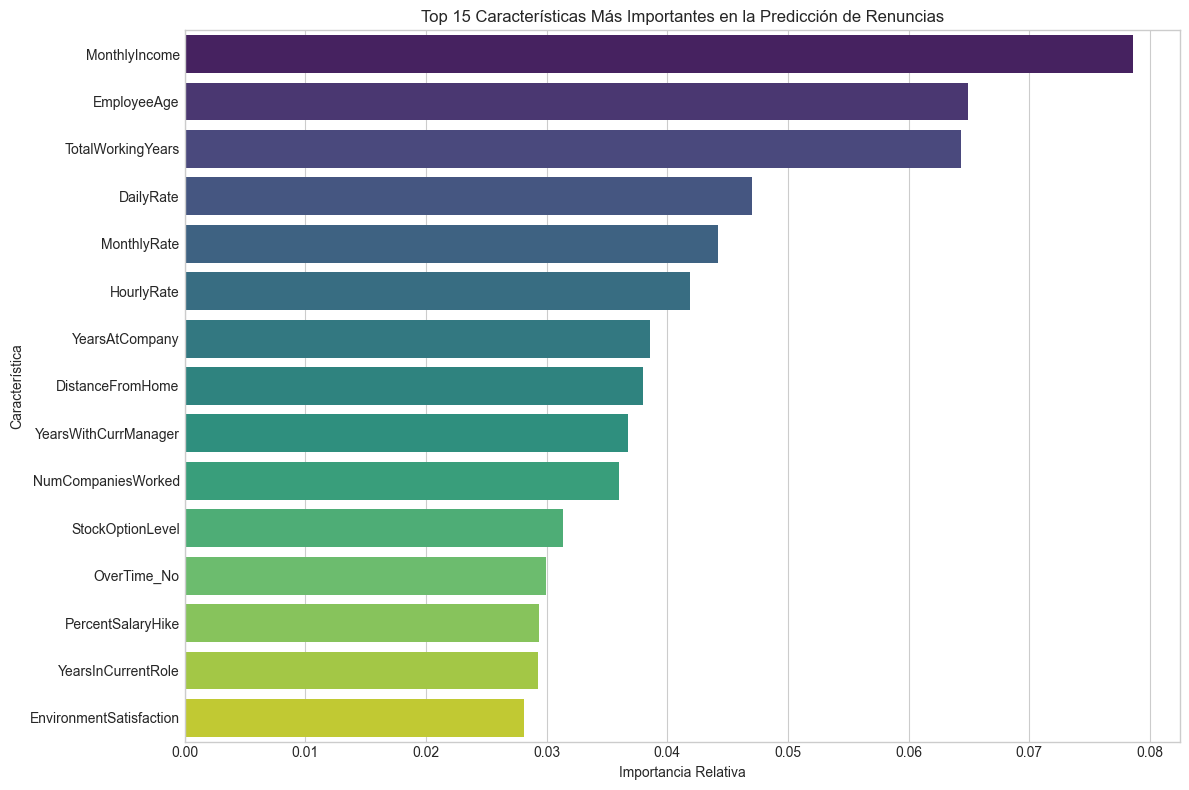


Top 15 características más importantes:
                    Feature  Importance
0             MonthlyIncome    0.078565
1               EmployeeAge    0.064964
2         TotalWorkingYears    0.064367
3                 DailyRate    0.047019
4               MonthlyRate    0.044172
5                HourlyRate    0.041920
6            YearsAtCompany    0.038566
7          DistanceFromHome    0.038014
8      YearsWithCurrManager    0.036713
9        NumCompaniesWorked    0.035995
10         StockOptionLevel    0.031323
11              OverTime_No    0.029981
12        PercentSalaryHike    0.029406
13       YearsInCurrentRole    0.029258
14  EnvironmentSatisfaction    0.028153


In [20]:
# 10. IMPORTANCIA DE LAS VARIABLES
print("\n10. ANÁLISIS DE IMPORTANCIA DE VARIABLES")
print("-" * 50)

# Extraer nombres de características después del preprocesamiento
preprocessor_fit = preprocessor.fit(X)
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_features)

# Ajustar el clasificador Random Forest directamente para obtener la importancia
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_transformed = preprocessor.transform(X_train)
rf_classifier.fit(X_train_transformed, y_train)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame con las características y sus importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por importancia y seleccionar las 15 más importantes
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
top_15_features = importance_df.head(15)

# Visualizar las 15 características más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')
plt.title('Top 15 Características Más Importantes en la Predicción de Renuncias')
plt.xlabel('Importancia Relativa')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('visualizaciones/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 15 características más importantes:")
print(top_15_features)

# 11 - IDENTIFICACIÓN DE PERFILES DE ALTO RIESGO


11. IDENTIFICACIÓN DE PERFILES DE ALTO RIESGO
--------------------------------------------------


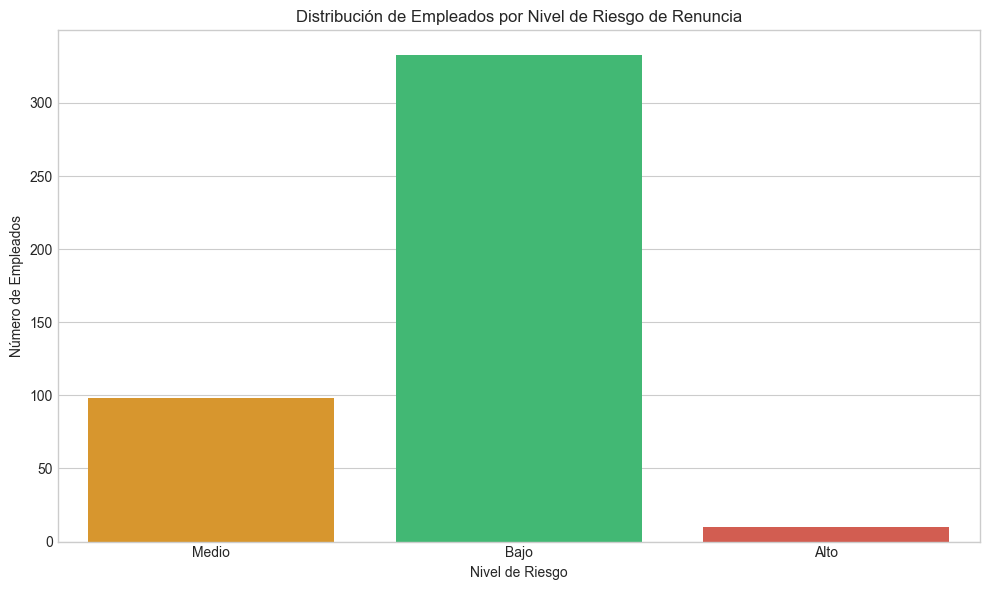

<Figure size 1200x600 with 0 Axes>

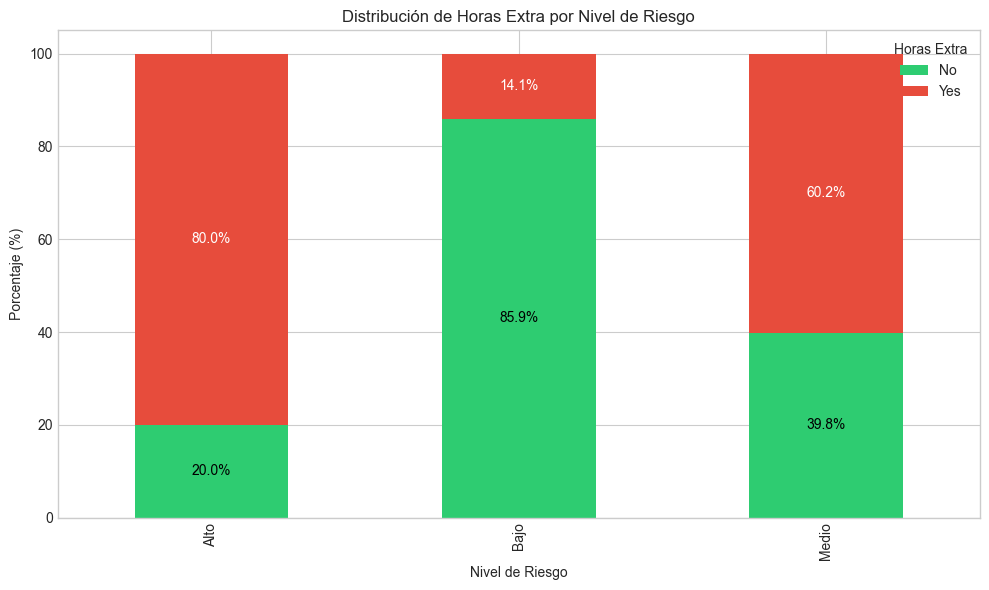


Perfiles de empleados con ALTO RIESGO de renuncia:


,EmployeeID,RealAttrition,PredAttrition,ProbAttrition,OverTime,JobRole,Department,YearsAtCompany,JobSatisfaction,WorkLifeBalance,RiskLevel
285,285,1,1,0.970951,Yes,Sales Representative,Sales,1,2,4,Alto
303,303,1,1,0.883711,Yes,Laboratory Technician,Research & Development,1,4,3,Alto
209,209,1,1,0.861121,Yes,Sales Representative,Sales,1,4,3,Alto
204,204,1,1,0.848579,Yes,Research Scientist,Research & Development,0,1,3,Alto
379,379,1,1,0.835407,Yes,Laboratory Technician,Research & Development,1,4,1,Alto
229,229,0,1,0.791822,No,Sales Representative,Sales,0,3,3,Alto
161,161,1,1,0.770080,Yes,Laboratory Technician,Research & Development,0,3,3,Alto
157,157,1,1,0.757600,No,Laboratory Technician,Research & Development,1,1,3,Alto
139,139,0,1,0.743324,Yes,Sales Representative,Sales,2,1,3,Alto
313,313,1,1,0.726035,Yes,Sales Representative,Sales,3,2,3,Alto


In [21]:
# 11. IDENTIFICACIÓN DE PERFILES DE ALTO RIESGO
print("\n11. IDENTIFICACIÓN DE PERFILES DE ALTO RIESGO")
print("-" * 50)

# Crear un DataFrame con los datos de prueba y las probabilidades predichas
X_test_reset = X_test.reset_index(drop=True)
risk_df = pd.DataFrame({
    'EmployeeID': X_test_reset.index,
    'RealAttrition': y_test.reset_index(drop=True),
    'PredAttrition': y_pred,
    'ProbAttrition': y_pred_proba
})

# Añadir características clave al DataFrame
key_features = ['OverTime', 'JobRole', 'Department', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
for feature in key_features:
    if feature in X_test.columns:
        risk_df[feature] = X_test_reset[feature].values

# Clasificar por nivel de riesgo
def assign_risk_level(probability):
    if probability < 0.3:
        return "Bajo"
    elif probability < 0.7:
        return "Medio"
    else:
        return "Alto"

risk_df['RiskLevel'] = risk_df['ProbAttrition'].apply(assign_risk_level)

# Visualizar distribución de niveles de riesgo
plt.figure(figsize=(10, 6))
sns.countplot(x='RiskLevel', data=risk_df, palette={'Bajo': '#2ecc71', 'Medio': '#f39c12', 'Alto': '#e74c3c'})
plt.title('Distribución de Empleados por Nivel de Riesgo de Renuncia')
plt.xlabel('Nivel de Riesgo')
plt.ylabel('Número de Empleados')
plt.tight_layout()
plt.savefig('visualizaciones/risk_level_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de factores clave por nivel de riesgo
if 'OverTime' in risk_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Crear crosstab y convertir a porcentaje
    overtime_risk = pd.crosstab(risk_df['RiskLevel'], risk_df['OverTime'], normalize='index') * 100
    
    # Crear gráfico de barras apiladas
    overtime_risk.plot(kind='bar', stacked=True, 
                    color=['#2ecc71', '#e74c3c'],
                    figsize=(10, 6))
    
    plt.title('Distribución de Horas Extra por Nivel de Riesgo')
    plt.xlabel('Nivel de Riesgo')
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='Horas Extra')
    
    # Añadir etiquetas con porcentajes en las barras
    for i, risk_level in enumerate(['Alto', 'Bajo', 'Medio']):
        if risk_level in overtime_risk.index:
            for j, col in enumerate(overtime_risk.columns):
                val = overtime_risk.loc[risk_level, col]
                if val > 5:  # Solo mostrar etiquetas para valores significativos
                    plt.text(i, overtime_risk.loc[risk_level, :].values[:j].sum() + val/2, 
                            f'{val:.1f}%', ha='center', va='center',
                            color='white' if col == 'Yes' else 'black')
    
    plt.tight_layout()
    plt.savefig('visualizaciones/overtime_by_risk.png', dpi=300, bbox_inches='tight')
    plt.show()

# Tabla con características de empleados de alto riesgo
high_risk = risk_df[risk_df['RiskLevel'] == 'Alto'].sort_values('ProbAttrition', ascending=False)
print("\nPerfiles de empleados con ALTO RIESGO de renuncia:")
display(high_risk.head(10).style.background_gradient(cmap='Reds', subset=['ProbAttrition']))

# 12 - CONCLUSIONES

In [22]:
# 12. CONCLUSIONES ESTRATÉGICAS Y RECOMENDACIONES
print("\n12. CONCLUSIONES ESTRATÉGICAS Y RECOMENDACIONES")
print("-" * 70)

# Extraer características más importantes
top_features_list = top_15_features['Feature'].tolist()[:10]

# Función para interpretar características
def interpret_feature(feature_name):
    # Procesar variables categóricas codificadas con OneHotEncoder
    for cat_feature in categorical_features:
        if cat_feature in feature_name and '_' in feature_name:
            # Extraer la categoría específica
            category = feature_name.split(cat_feature + '_')[1]
            return f"{cat_feature} = {category}"
    return feature_name

# Interpretar las top características
interpreted_features = [interpret_feature(feature) for feature in top_features_list]

# 12.1 Resumen de factores críticos de renuncia
print("\n12.1 FACTORES CRÍTICOS QUE INFLUYEN EN LA RENUNCIA:")
for i, feature in enumerate(interpreted_features, 1):
    print(f"{i}. {feature}")

# 12.2 Análisis de tipos de empleados con mayor riesgo
# Perfiles más propensos a renunciar
high_risk_criteria = []

# Analizar horas extras
if 'OverTime' in df.columns:
    overtime_attrition = df.groupby('OverTime')['EmployeeAttrition_Binary'].mean() * 100
    if 'Yes' in overtime_attrition.index and overtime_attrition['Yes'] > overtime_attrition.get('No', 0):
        high_risk_criteria.append(f"Empleados con horas extras (tasa de renuncia: {overtime_attrition['Yes']:.1f}%)")

# Analizar departamentos
if 'Department' in df.columns:
    dept_attrition = df.groupby('Department')['EmployeeAttrition_Binary'].mean() * 100
    high_risk_dept = dept_attrition.idxmax()
    high_risk_criteria.append(f"Empleados del departamento de {high_risk_dept} (tasa de renuncia: {dept_attrition.max():.1f}%)")

# Analizar roles
if 'JobRole' in df.columns:
    role_attrition = df.groupby('JobRole')['EmployeeAttrition_Binary'].mean() * 100
    high_risk_role = role_attrition.idxmax()
    high_risk_criteria.append(f"Empleados con rol de {high_risk_role} (tasa de renuncia: {role_attrition.max():.1f}%)")

# Analizar distancia al trabajo
if 'DistanceFromHome' in df.columns:
    # Calcular correlación entre distancia y renuncia
    distance_corr = df['DistanceFromHome'].corr(df['EmployeeAttrition_Binary'])
    if distance_corr > 0.05:  # Umbral arbitrario
        high_risk_criteria.append(f"Empleados con mayor distancia al trabajo (correlación: {distance_corr:.2f})")

# Analizar satisfacción laboral
if 'JobSatisfaction' in df.columns:
    # Calcular correlación entre satisfacción y renuncia
    sat_corr = df['JobSatisfaction'].corr(df['EmployeeAttrition_Binary'])
    if sat_corr < -0.05:  # Umbral arbitrario
        high_risk_criteria.append(f"Empleados con baja satisfacción laboral (correlación: {sat_corr:.2f})")

print("\n12.2 PERFILES DE EMPLEADOS CON MAYOR RIESGO DE RENUNCIA:")
for i, criteria in enumerate(high_risk_criteria, 1):
    print(f"{i}. {criteria}")

# 12.3 Recomendaciones para reducir la tasa de renuncia
print("\n12.3 RECOMENDACIONES ESTRATÉGICAS PARA REDUCIR LA TASA DE RENUNCIA:")

recommendations = [
    "Implementar un programa de equilibrio trabajo-vida para reducir las horas extras",
    "Revisar las políticas salariales, especialmente en roles y departamentos con alta rotación",
    "Desarrollar planes de carrera claros para aumentar la retención de empleados",
    "Implementar programas de reconocimiento para mejorar la satisfacción laboral",
    "Considerar opciones de trabajo remoto para empleados que viven lejos",
    "Realizar entrevistas de permanencia periódicas para identificar problemas temprano"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

# 12.4 Implementación del modelo en la organización
print("\n12.4 IMPLEMENTACIÓN DEL MODELO EN LA ORGANIZACIÓN:")
print("1. Automatizar la identificación mensual de empleados con alto riesgo de renuncia")
print("2. Integrar los resultados del modelo con el sistema de RRHH")
print("3. Establecer umbrales de intervención basados en niveles de riesgo")
print("4. Desarrollar protocolos de intervención específicos por departamento")
print("5. Monitorizar la efectividad de las intervenciones utilizando el modelo como referencia")
print("6. Actualizar el modelo trimestralmente con nuevos datos para mantener su precisión")


12. CONCLUSIONES ESTRATÉGICAS Y RECOMENDACIONES
----------------------------------------------------------------------

12.1 FACTORES CRÍTICOS QUE INFLUYEN EN LA RENUNCIA:
1. MonthlyIncome
2. EmployeeAge
3. TotalWorkingYears
4. DailyRate
5. MonthlyRate
6. HourlyRate
7. YearsAtCompany
8. DistanceFromHome
9. YearsWithCurrManager
10. NumCompaniesWorked

12.2 PERFILES DE EMPLEADOS CON MAYOR RIESGO DE RENUNCIA:
1. Empleados con horas extras (tasa de renuncia: 30.5%)
2. Empleados del departamento de Sales (tasa de renuncia: 20.6%)
3. Empleados con rol de Sales Representative (tasa de renuncia: 39.8%)
4. Empleados con mayor distancia al trabajo (correlación: 0.08)
5. Empleados con baja satisfacción laboral (correlación: -0.10)

12.3 RECOMENDACIONES ESTRATÉGICAS PARA REDUCIR LA TASA DE RENUNCIA:
1. Implementar un programa de equilibrio trabajo-vida para reducir las horas extras
2. Revisar las políticas salariales, especialmente en roles y departamentos con alta rotación
3. Desarrollar planes 